In [1]:
#Importing pandas
import pandas as pd

In [2]:
#Pulling in csv data from GitHub. End of the code is for if we have an extra column in the data and need to remove it
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2020.csv')#.iloc[:, 1:]

In [3]:
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1


In [4]:
#Helpful to find what type of data we have in our frame. Object/int/float
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         626 non-null    object 
 1   Tm             626 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            626 non-null    int64  
 4   G              626 non-null    int64  
 5   GS             626 non-null    int64  
 6   Tgt            626 non-null    int64  
 7   Rec            626 non-null    int64  
 8   PassingYds     626 non-null    int64  
 9   PassingTD      626 non-null    int64  
 10  PassingAtt     626 non-null    int64  
 11  RushingYds     626 non-null    int64  
 12  RushingTD      626 non-null    int64  
 13  RushingAtt     626 non-null    int64  
 14  ReceivingYds   626 non-null    int64  
 15  ReceivingTD    626 non-null    int64  
 16  FantasyPoints  570 non-null    float64
 17  Int            626 non-null    int64  
 18  Fumbles   

In [5]:
#To prevent chained assignment error. Can just use dp.copy in order to get around the error as well.
pd.set_option('chained_assignment', None)

In [6]:
fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'Rec': 1 # adjust for PPR
}


rb_df = df.loc[df['Pos'] == 'RB']

"""
Here, we are using apply with axis=1
This allows to map a function across an entire row, instead of across a column.
To learn more information about apply and setting axis=1,
check out the pandas documentation.
"""

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

# create a FantasyPoints/G column
rb_df['FantasyPoints/G'] = rb_df.apply(get_fantasy_points, axis=1)

rb_df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,...,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,FantasyPoints/G
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,...,2027,17,378,114,0,314.0,0,3,2,20.693750
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,...,932,16,187,756,5,295.0,0,1,0,25.186667
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,...,1557,16,312,361,1,294.0,0,5,3,23.700000
11,Jonathan Taylor,IND,RB,21,15,13,39,36,0,0,...,1169,11,232,299,1,217.0,0,1,1,16.853333
12,Aaron Jones,GNB,RB,26,14,14,63,47,0,0,...,1104,9,201,355,2,212.0,0,2,0,18.492857


C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


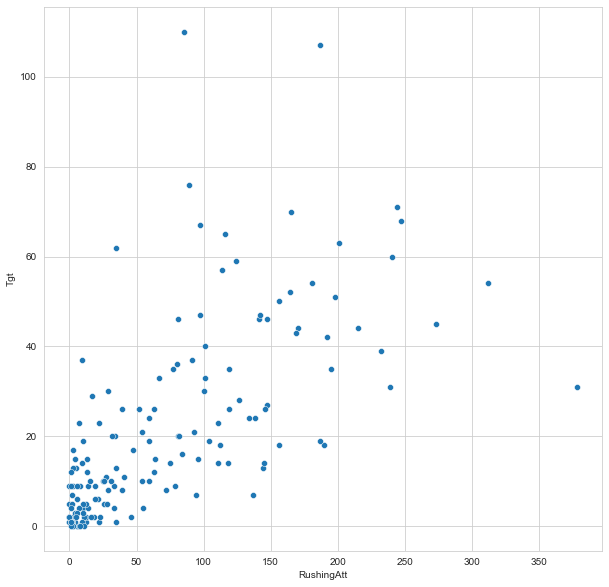

In [40]:
#Intro to data visualization with seaborn
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))

sns.scatterplot(rb_df['RushingAtt'], rb_df['Tgt']); #can use a ; after this to remove the 'AxesSubPlot' title


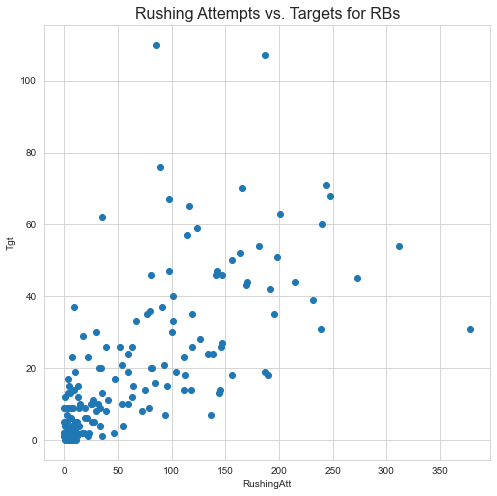

In [8]:
#Can also graph this in mathplotlib
plt.figure(figsize=(8, 8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs. Targets for RBs', fontsize=16)
plt.show()

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usage/G', ylabel='FantasyPoints/G'>

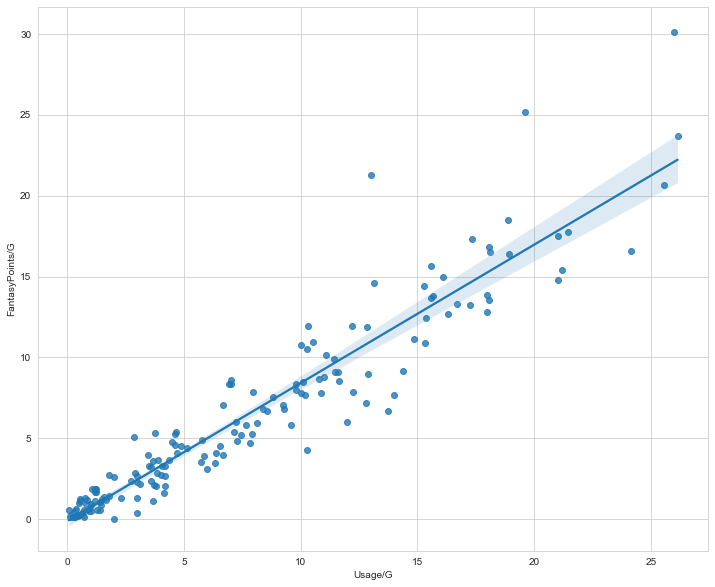

In [9]:
#Plotting a regression using usage per game and fantasy points per game to see if there is a correlation.
#As you can see, a player's usage per game is tightly correlated with their fantasy football output. 
#This is useful information to know. Start your studs who are getting consistent touches week after week. Sit everyone else.
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G']

plt.figure(figsize=(12, 10))
sns.regplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])

<AxesSubplot:xlabel='RushingAtt', ylabel='Density'>

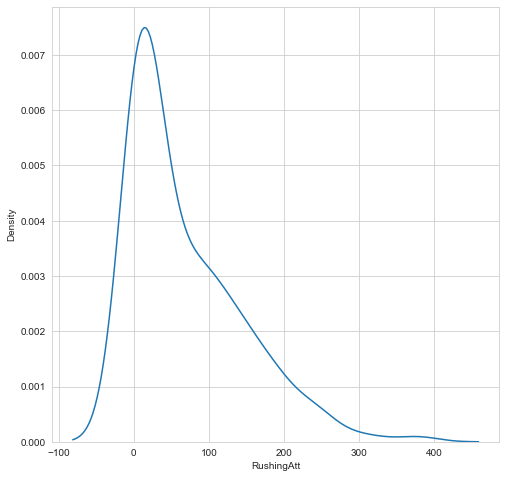

In [10]:
#The graph right below here, is a kernel density estimation, which is an attempt to plot the distribution of the data. 

plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['RushingAtt'])

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RushingAtt', ylabel='Density'>

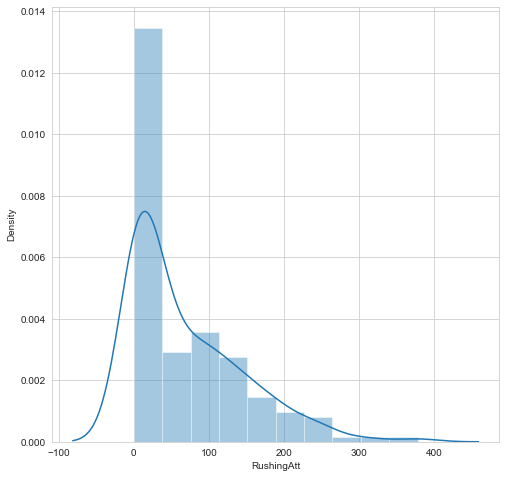

In [11]:
#Distributipon plot. The bar represents a count.
#This is more less expected, and follows what's called a Pareto distribution 
#(80% of the effects of a system come from 20% of the causes). 
#In this case scenario, roughly a small proportion of running backs account for the majority of rushing attempts. 
#Let's see if this is also the case with Fantasy Football performance.
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['RushingAtt'])

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tgt', ylabel='Density'>

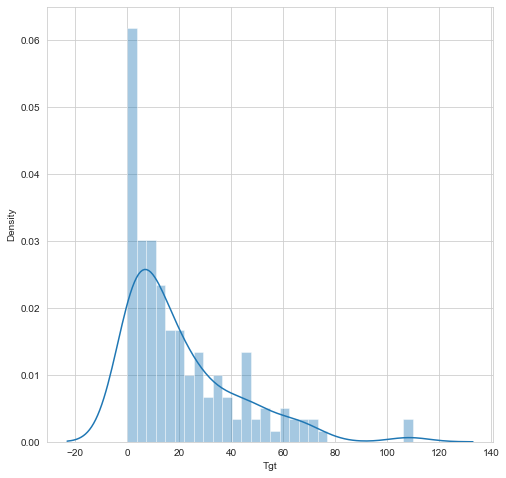

In [12]:
#Same graph just increasing the number of buckets
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['Tgt'], bins=30)

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='FantasyPoints/G', ylabel='Density'>

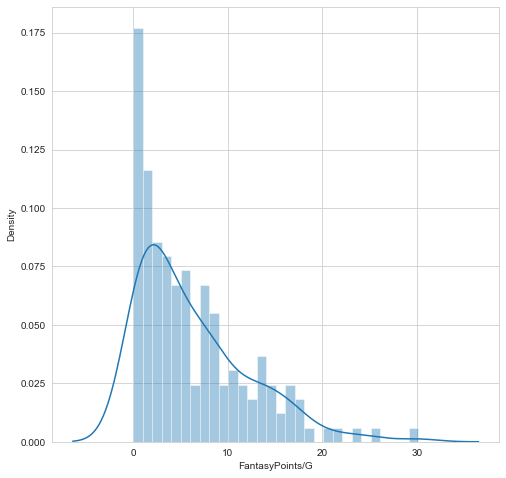

In [13]:
#Doing the same but for fantasy points
plt.figure(figsize=(8, 8))
sns.distplot(rb_df['FantasyPoints/G'], bins=30)


(array([83., 18., 22., 17.,  9.,  6.,  5.,  1.,  1.,  1.]),
 array([  0. ,  37.8,  75.6, 113.4, 151.2, 189. , 226.8, 264.6, 302.4,
        340.2, 378. ]),
 <BarContainer object of 10 artists>)

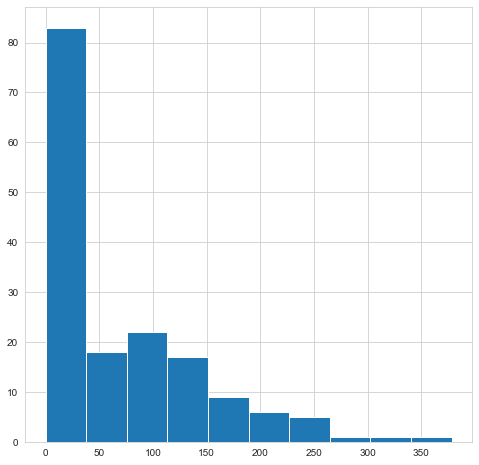

In [14]:
#Simple histogram
plt.figure(figsize=(8, 8))
plt.hist(rb_df['RushingAtt'])

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


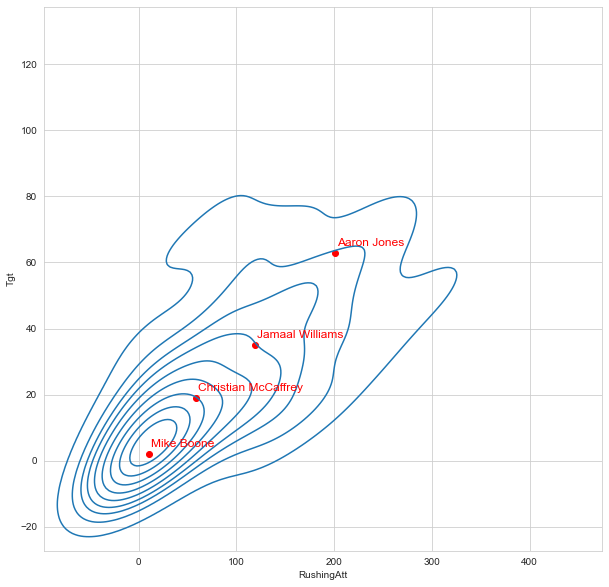

In [15]:
#Here, we use the object-oriented API for matplotlib to be able to have greater control over our plot.
#We can use the fig and ax objects we get back from the plt.subplots function to annotate points for example.


fig, ax = plt.subplots(figsize=(10, 10))

notable_players = [
    'Christian McCaffrey', 'Aaron Jones', 'Jamaal Williams', 'Mike Boone'
]

for player_name in notable_players:
    
    player = rb_df.loc[rb_df['Player'] == player_name]
    
    # if our df we get back is not empty, run the code below
    if not player.empty:
        # grab targets and rushing attempts
        targets = player['Tgt']
        rushes = player['RushingAtt']
     
        ax.annotate(player_name, xy=(rushes+2, targets+2), color='red', fontsize=12)
        ax.scatter(rushes, targets, color='red')
    
# set ax parameter to the ax we created above with plt.subplots
sns.kdeplot(rb_df['RushingAtt'], rb_df['Tgt'], ax=ax);

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


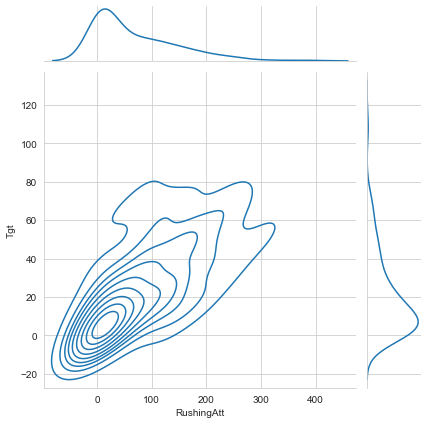

In [16]:
sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='kde')

C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


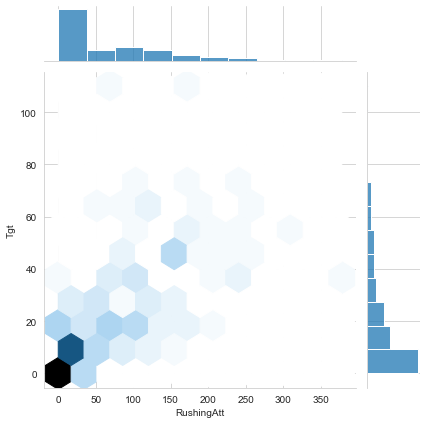

In [17]:
sns.jointplot(rb_df['RushingAtt'], rb_df['Tgt'], kind='hex')


C:\Users\dymar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


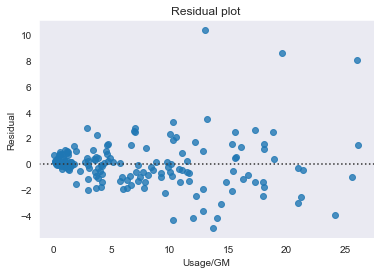

In [18]:
#Points bunched around the 0 part of our line indicate that our line of best fit perfectly matched up with 
#the an X, Y point on the plane. The further we move away from 'Y' the bigger the error.
#Points above the y-axis represent those points that our line of best fit overestimated a player's projected fantasy performance. 
#Points below represent those points that we underestimated
sns.set_style('dark') # changing up the style

sns.residplot(rb_df['Usage/G'], rb_df['FantasyPoints/G'])
plt.title('Residual plot')
plt.xlabel('Usage/GM') # this is how we set an x label in matplotlib
plt.ylabel('Residual') # this is how we set a y label in matplotlib
plt.show() # show our plot

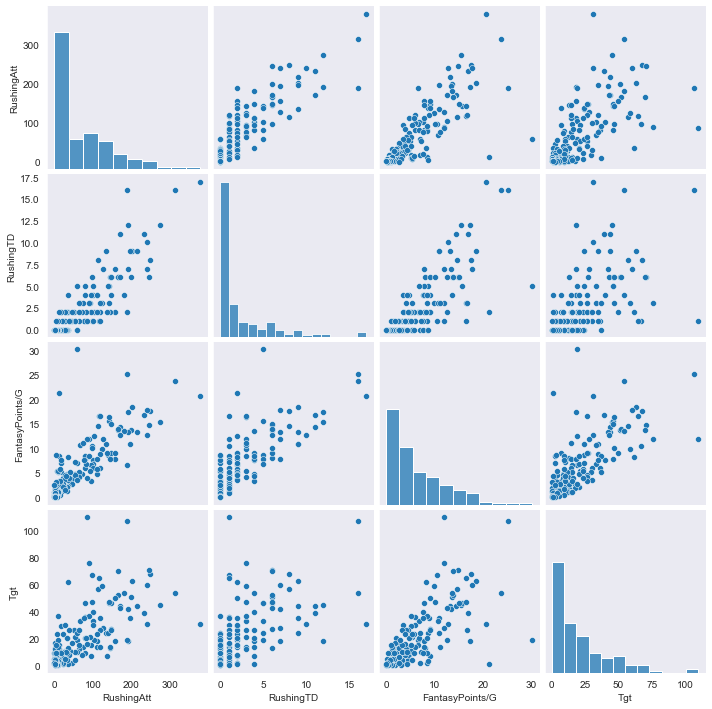

In [19]:
#Able to run quick scatterplot charts based on values inputed

rb_df_copy = rb_df[['RushingAtt', 'RushingTD', 'FantasyPoints/G', 'Tgt']]

sns.pairplot(rb_df_copy)

In [20]:
#Automatically pulling weekly data from GitHub
final_df = pd.DataFrame()

#note the curly braces in the string format. This allows the string to be updated with the format string method.
WEEKLY_BASE_URL = 'https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/{year}/week{week}.csv'

year = 2019

for week in range(1, 18):
    df = pd.read_csv(WEEKLY_BASE_URL.format(year=year, week=week)) # index_col=0 not necessary here. Data is properly formatted with Unnamed: 0 column
    df['Week'] = week
    final_df = pd.concat([final_df, df]) #able to concatenate because both datatables share the same columns
    
print(final_df.shape)
final_df.head()

(4779, 20)


,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
1,Dak Prescott,QB,DAL,405.0,4.0,0.0,32.0,25.0,4.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,33.40,33.40,33.40,1
2,Robert Griffin,QB,BAL,55.0,1.0,0.0,6.0,6.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,7.10,7.10,7.10,1
3,Patrick Mahomes,QB,KAN,378.0,3.0,0.0,33.0,25.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,27.32,27.32,27.32,1
4,Kirk Cousins,QB,MIN,98.0,1.0,0.0,10.0,8.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,14.32,14.32,14.32,1


In [21]:
lamar = final_df.loc[final_df['Player'] == 'Lamar Jackson']
mahomes = final_df.loc[final_df['Player'] == 'Patrick Mahomes']
wilson = final_df.loc[final_df['Player'] == 'Russell Wilson']

lamar

,Player,Pos,Tm,PassingYds,PassingTD,Int,PassingAtt,Cmp,RushingAtt,RushingYds,RushingTD,Rec,Tgt,ReceivingYds,ReceivingTD,FL,PPRFantasyPoints,StandardFantasyPoints,HalfPPRFantasyPoints,Week
0,Lamar Jackson,QB,BAL,324.0,5.0,0.0,20.0,17.0,3.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,33.56,33.56,33.56,1
7,Lamar Jackson,QB,BAL,272.0,2.0,0.0,37.0,24.0,16.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,30.88,30.88,30.88,2
28,Lamar Jackson,QB,BAL,267.0,0.0,0.0,43.0,22.0,8.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,21.28,21.28,21.28,3
13,Lamar Jackson,QB,BAL,247.0,3.0,2.0,34.0,24.0,9.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,24.48,24.48,24.48,4
31,Lamar Jackson,QB,BAL,161.0,1.0,3.0,28.0,19.0,14.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,11.44,11.44,11.44,5
15,Lamar Jackson,QB,BAL,236.0,0.0,0.0,33.0,21.0,19.0,152.0,1.0,0.0,0.0,0.0,0.0,0.0,30.64,30.64,30.64,6
27,Lamar Jackson,QB,BAL,143.0,0.0,0.0,20.0,9.0,14.0,116.0,1.0,0.0,0.0,0.0,0.0,0.0,23.32,23.32,23.32,7
11,Lamar Jackson,QB,BAL,163.0,1.0,0.0,23.0,17.0,16.0,61.0,2.0,0.0,0.0,0.0,0.0,0.0,28.62,28.62,28.62,9
0,Lamar Jackson,QB,BAL,223.0,3.0,0.0,17.0,15.0,7.0,65.0,1.0,0.0,0.0,0.0,0.0,0.0,33.42,33.42,33.42,10
1,Lamar Jackson,QB,BAL,222.0,4.0,0.0,24.0,17.0,10.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,32.78,32.78,32.78,11


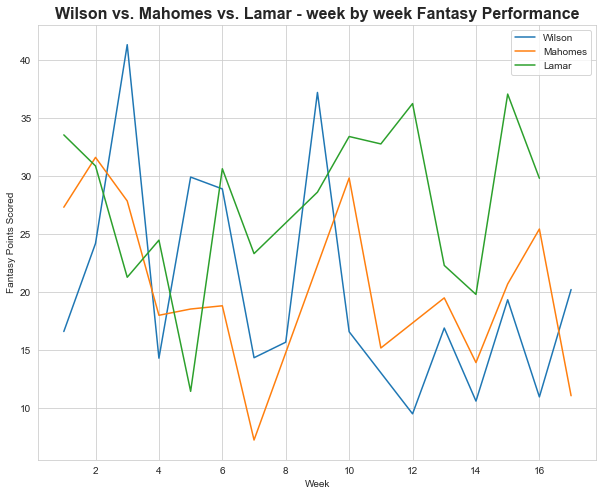

In [22]:
#Graphing just fantasy points data on a weekly basis for the players and then comparing

sns.set_style('whitegrid') # setting style
plt.subplots(figsize=(10, 8)) # setting figure size
plt.plot(wilson['Week'], wilson['StandardFantasyPoints']) # first argument is x, second is y
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(lamar['Week'], lamar['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Lamar']) # setting legend in order of how we plotted things
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Lamar - week by week Fantasy Performance', fontsize=16, fontweight='bold') # adjusting font size to 16px
plt.show() # show our visualization, not completely necessary, but surpresses unneccessary output from matplotlib


In [25]:
#Correlation matrix. Double "[[" brings back a dataframe while single "[" bring back a list.
#Anything close to 1 means more correlated while 1 means it moves in tandem
lamar.corr()[['StandardFantasyPoints']]

,StandardFantasyPoints
PassingYds,0.415339
PassingTD,0.625982
Int,-0.698805
PassingAtt,-0.313310
Cmp,-0.086869
RushingAtt,-0.295666
RushingYds,0.139054
RushingTD,-0.090980
Rec,NaN
Tgt,NaN


In [32]:
#Finding a player in the data fram and then running the correlation matrix
final_df.loc[final_df['Player'] == 'Jameis Winston'].corr()[['StandardFantasyPoints']]

,StandardFantasyPoints
PassingYds,0.684858
PassingTD,0.915287
Int,-0.273450
PassingAtt,0.061229
Cmp,0.386302
RushingAtt,0.091213
RushingYds,-0.157105
RushingTD,0.502280
Rec,NaN
Tgt,NaN


<AxesSubplot:>

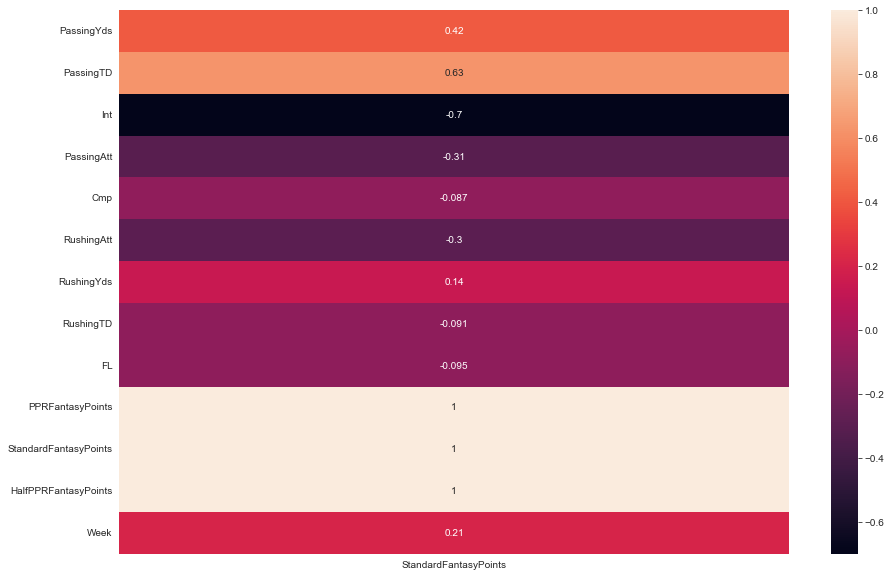

In [33]:
#Running the same correlation matrix and turning it into a heatmap
import numpy as np
plt.figure(figsize=(15, 10))
lamar = lamar.drop(['Rec', 'Tgt', 'ReceivingYds', 'ReceivingTD'], axis=1) # dropping non-relevant fantasy stats
sns.heatmap(lamar.corr()[['StandardFantasyPoints']], annot=True)


In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv').iloc[:, 1:]
print(df.dtypes)
df_copy = df.copy(deep=True)

fantasy_scoring_weights = {
    'RushingYds': 0.1,
    'ReceivingYds': 0.1,
    'ReceivingTD': 6,
    'RushingTD': 6,
    'FumblesLost': -2,
    'PassingYds': 0.04,
    'PassingTD': 4,
    'Int': -2,
    'Rec': 1 # adjust for PPR
}

def get_fantasy_points(row):
    
    g = row['G'] # access the G column
    
    fantasy_points = sum([row[column]*weight for column, weight in fantasy_scoring_weights.items()])
    
    return fantasy_points / g

df_copy.loc[:, 'Usage/Gm'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df_copy.loc[:, 'FantasyPoints/Gm'] = df.apply(get_fantasy_points, axis=1)

Player            object
Tm                object
Pos               object
Age              float64
G                float64
GS               float64
Tgt              float64
Rec              float64
PassingYds       float64
PassingTD        float64
PassingAtt       float64
RushingYds       float64
RushingTD        float64
RushingAtt       float64
ReceivingYds     float64
ReceivingTD      float64
FantasyPoints    float64
Int              float64
Fumbles          float64
FumblesLost      float64
dtype: object


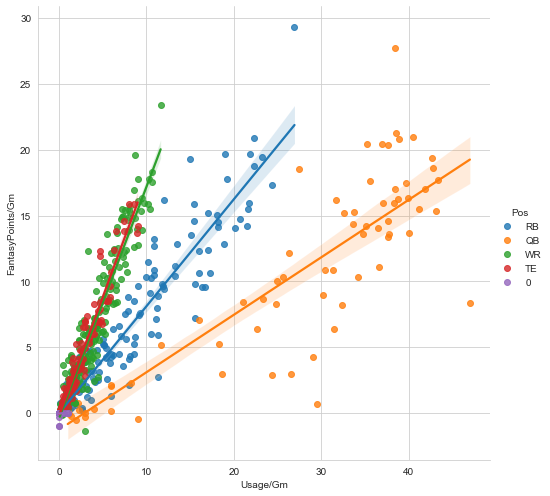

In [35]:
sns.lmplot(data=df_copy, x='Usage/Gm', y='FantasyPoints/Gm', hue='Pos', height=7)

<AxesSubplot:>

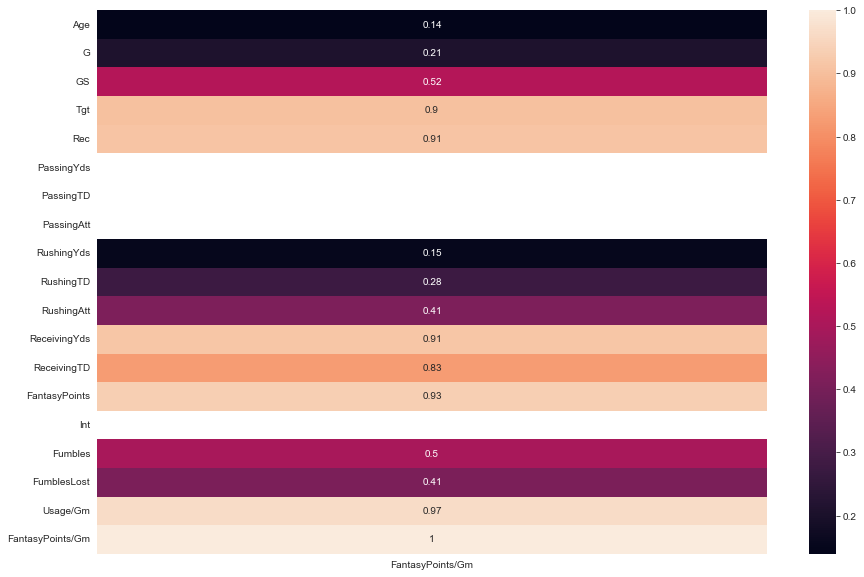

In [36]:
#Fantasy Football performance for TE's is more correlated to the number of targets 
#and receptions they get throughout the game than touchdowns.
corr = df_copy.loc[df_copy['Pos'] == 'TE'].corr()[['FantasyPoints/Gm']]
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

In [37]:
#Data from the NFL combine
COMBINE_URL = "https://raw.githubusercontent.com/fantasydatapros/data/master/combine/combine00to20.csv"

"""
The first two columns of this CSV file are messed up. Using iloc to grab all rows (:), and then grab the column indexed at 2 (so the third column), all the way to the last.
"""
combine_df = pd.read_csv(COMBINE_URL).iloc[:, 2:] # this is subject to change as I clean the data
combine_df.head()

,Rk,Year,Player,Pos,Age,AV,School,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,Drafted (tm/rnd/yr)
0,1,2000,Bashir Yamini,WR,22.0,0,Iowa,6-3,191,4.53,33.0,NaN,130.0,7.09,4.18,NaN
1,2,2000,James Williams,WR,22.0,4,Marshall,5-11,180,4.59,36.0,NaN,123.0,7.22,4.16,Seattle Seahawks / 6th / 175th pick / 2000
2,3,2000,Dez White,WR,20.0,19,Georgia Tech,6-1,218,4.62,37.5,NaN,124.0,6.91,4.09,Chicago Bears / 3rd / 69th pick / 2000
3,4,2000,Peter Warrick,WR,22.0,30,Florida State,5-11,194,4.58,NaN,NaN,NaN,NaN,NaN,Cincinnati Bengals / 1st / 4th pick / 2000
4,5,2000,Troy Walters,WR,23.0,13,Stanford,5-6,171,4.55,32.5,NaN,106.0,6.61,3.84,Minnesota Vikings / 5th / 165th pick / 2000


In [38]:
#Here, we groupby the column Pos, and then print out descriptive statistics for the data using the describe method.

combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
QB,209.0,4.813445,0.176743,4.33,4.71,4.82,4.91,5.37
RB,414.0,4.536739,0.102188,4.24,4.46,4.54,4.60,4.84
TE,268.0,4.755784,0.137573,4.37,4.66,4.77,4.84,5.06
WR,612.0,4.493513,0.097411,4.22,4.42,4.50,4.56,4.79


<AxesSubplot:xlabel='Pos', ylabel='40YD'>

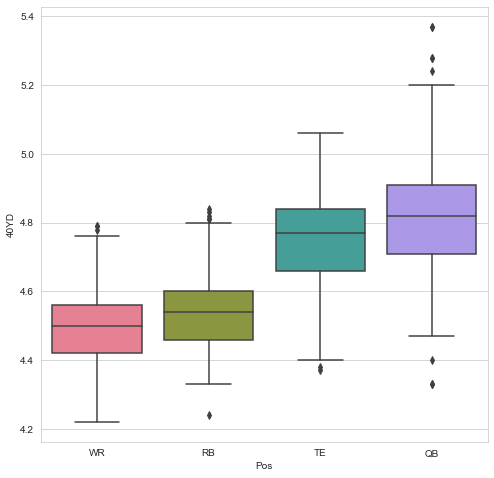

In [39]:
#Information on how you can adjust the palette argument of this function and all seaborn functions can be found here
#https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette
#Essentially, you need to create a palette object using the color_palette function
plt.figure(figsize=(8, 8))

sns.boxplot(x='Pos', y='40YD', data=combine_df, palette=sns.color_palette("husl", n_colors=4))
